In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("Data/Train_dataset.xlsx")

In [3]:
## See first few rows of dataset#####
df.head()

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,1,Bhubaneshwar,Female,Mrs,mansi,YES,1,Farmer,Public,2,...,93,233,82,58,27,7,3600000,1300000,2,49.135010
1,2,Bhubaneshwar,Female,Mrs,riya masi,YES,2,Farmer,Walk,2,...,56,328,89,68,5,6,1600000,400000,1,51.147880
2,3,Bhubaneshwar,Female,Mrs,sunita,NO,1,Cleaner,Public,2,...,137,213,77,43,40,6,3400000,900000,1,73.224000
3,4,Bhubaneshwar,Female,Mrs,anjali @ babli,YES,1,Driver,Car,2,...,167,275,64,60,27,7,700000,2300000,1,48.779225
4,5,Bhubaneshwar,Female,Mrs,champa karketta,NO,2,Manufacturing,Car,2,...,153,331,71,64,32,7,3200000,1100000,1,87.868800


In [4]:
## See all columns of the dataset ####
df.head().transpose()

,0,1,2,3,4
people_ID,1,2,3,4,5
Region,Bhubaneshwar,Bhubaneshwar,Bhubaneshwar,Bhubaneshwar,Bhubaneshwar
Gender,Female,Female,Female,Female,Female
Designation,Mrs,Mrs,Mrs,Mrs,Mrs
Name,mansi,riya masi,sunita,anjali @ babli,champa karketta
Married,YES,YES,NO,YES,NO
Children,1,2,1,1,2
Occupation,Farmer,Farmer,Cleaner,Driver,Manufacturing
Mode_transport,Public,Walk,Public,Car,Car
cases/1M,2,2,2,2,2


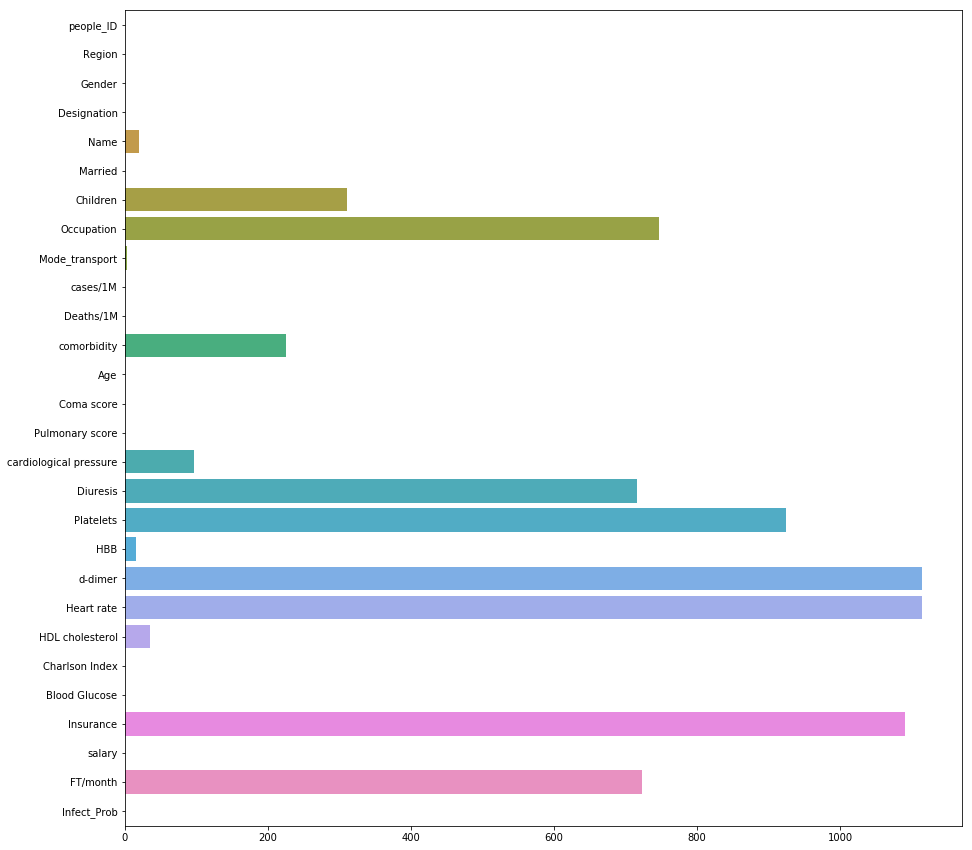

In [5]:
### Count total number of missing values ####
null = df.isnull().sum()
plt.figure(figsize=(15,15))
sns.barplot(x=null.values,y=null.index,orient="h")

In [6]:
null


people_ID                    0
Region                       0
Gender                       0
Designation                  0
Name                        20
Married                      0
Children                   311
Occupation                 747
Mode_transport               3
cases/1M                     0
Deaths/1M                    0
comorbidity                226
Age                          0
Coma score                   0
Pulmonary score              0
cardiological pressure      97
Diuresis                   716
Platelets                  924
HBB                         16
d-dimer                   1114
Heart rate                1114
HDL cholesterol             35
Charlson Index               0
Blood Glucose                0
Insurance                 1090
salary                       0
FT/month                   723
Infect_Prob                  0
dtype: int64

In [7]:
df.shape

(10714, 28)

# Let's divide the data into two parts:

* Part A: Normal Data Features
 Features Included: Region, Gender, Designation,Name,Married,Children,Age,Occupation etc.
 
* Part B: Medical Data Features
 Features Included: Coma Score, Pulmonary Score,Cardiological Pressure,Diuresis,Platelets HBB,d-dimer etc.
 
 Now let's independently analyze the effects of these features on the infection probability


In [106]:
normie_df = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,24,25,26,27]]
medical_df = df.iloc[:,[0,13,14,15,16,17,18,19,20,21,22,23,27]]
labels = df.iloc[:,-1]

In [107]:
normie_df.head().transpose()

,0,1,2,3,4
people_ID,1,2,3,4,5
Region,Bhubaneshwar,Bhubaneshwar,Bhubaneshwar,Bhubaneshwar,Bhubaneshwar
Gender,Female,Female,Female,Female,Female
Designation,Mrs,Mrs,Mrs,Mrs,Mrs
Name,mansi,riya masi,sunita,anjali @ babli,champa karketta
Married,YES,YES,NO,YES,NO
Children,1,2,1,1,2
Occupation,Farmer,Farmer,Cleaner,Driver,Manufacturing
Mode_transport,Public,Walk,Public,Car,Car
cases/1M,2,2,2,2,2


In [108]:
medical_df.head().transpose()

,0,1,2,3,4
people_ID,1,2,3,4,5
Coma score,8,15,13,9,7
Pulmonary score,<400,<100,<300,<200,<400
cardiological pressure,Normal,Stage-02,Elevated,Stage-01,Normal
Diuresis,441,NaN,416,410,390
Platelets,154,121,124,98,21
HBB,93,56,137,167,153
d-dimer,233,328,213,275,331
Heart rate,82,89,77,64,71
HDL cholesterol,58,68,43,60,64


In [109]:
labels.head()

0    49.135010
1    51.147880
2    73.224000
3    48.779225
4    87.868800
Name: Infect_Prob, dtype: float64

# Analyzing Normal Data
Designation seems like a useless feature since married and gender cover it. So we can eliminate it easily

In [110]:
normie_df = normie_df.drop(["Designation"],axis=1)

In [111]:
normie_df.head().transpose()

,0,1,2,3,4
people_ID,1,2,3,4,5
Region,Bhubaneshwar,Bhubaneshwar,Bhubaneshwar,Bhubaneshwar,Bhubaneshwar
Gender,Female,Female,Female,Female,Female
Name,mansi,riya masi,sunita,anjali @ babli,champa karketta
Married,YES,YES,NO,YES,NO
Children,1,2,1,1,2
Occupation,Farmer,Farmer,Cleaner,Driver,Manufacturing
Mode_transport,Public,Walk,Public,Car,Car
cases/1M,2,2,2,2,2
Deaths/1M,0,0,0,0,0


# Step 1: Remove clearly redundant features

* Cases/1M is the same for every place name. Clearly the feature can be used as a worthy label encoder for the place name since its magnitude is useful in this case i.e more the nunber of cases in the place more the probability of infection.

* Designation is a combination of marriage status and gender. Hence we can remove that too.

In [112]:
normie_df = normie_df.drop(labels=["Name"],axis=1)




In [113]:
normie_df.head().transpose()

,0,1,2,3,4
people_ID,1,2,3,4,5
Region,Bhubaneshwar,Bhubaneshwar,Bhubaneshwar,Bhubaneshwar,Bhubaneshwar
Gender,Female,Female,Female,Female,Female
Married,YES,YES,NO,YES,NO
Children,1,2,1,1,2
Occupation,Farmer,Farmer,Cleaner,Driver,Manufacturing
Mode_transport,Public,Walk,Public,Car,Car
cases/1M,2,2,2,2,2
Deaths/1M,0,0,0,0,0
comorbidity,Hypertension,Diabetes,None,Coronary Heart Disease,Diabetes


In [79]:
normie_df = normie_df.drop(labels=["Region"],axis=1)

In [114]:
normie_df = normie_df.dropna()

In [115]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
def transform(data,indices,choice=None):
    onehot = OneHotEncoder()
    le = LabelEncoder()
    new_df = {}
    col_names = {}
    for index in  indices:
        temp_df = data.iloc[:,index]
    
        temp_df = temp_df.reshape(-1,1)
        
        if(choice==0):
            temp_df = le.fit_transform(temp_df)
        elif(choice==1):
            #t_temp_df = le.fit_transform(temp_df)
            t_temp_df = temp_df.reshape(-1,1)
            temp_df = onehot.fit_transform(t_temp_df)
        new_df[data.columns[index]] = temp_df
        #col_names[data.columns[index]] = onehot.categories_
    return new_df,col_names
    
    

In [117]:
#new_df,col_names = transform(clone,[0,1,3,4,7],0)
clone = normie_df.copy()


In [125]:
### IF ENCODING IS NUMERIC #####
def return_df(df_new,req_df):
    for key in new_df.keys():
        if(key!="people_ID"):
            req_df[key] = new_df[key]
    return req_df

###IF ENCODING IS ONE HOT #####

'''index = 0
for key in new_df.keys():
    
    test_df = pd.DataFrame(new_df[key].toarray())
    test_df.columns = col_names[key]
    clone = pd.concat([clone,test_df],axis=1)
    clone = clone.drop(key,axis=1)'''
    



'index = 0\nfor key in new_df.keys():\n    \n    test_df = pd.DataFrame(new_df[key].toarray())\n    test_df.columns = col_names[key]\n    clone = pd.concat([clone,test_df],axis=1)\n    clone = clone.drop(key,axis=1)'

In [118]:
#clone = clone.set_index("people_ID")
clone.head().transpose()

#new_df

,0,1,2,3,4
people_ID,1,2,3,4,5
Region,Bhubaneshwar,Bhubaneshwar,Bhubaneshwar,Bhubaneshwar,Bhubaneshwar
Gender,Female,Female,Female,Female,Female
Married,YES,YES,NO,YES,NO
Children,1,2,1,1,2
Occupation,Farmer,Farmer,Cleaner,Driver,Manufacturing
Mode_transport,Public,Walk,Public,Car,Car
cases/1M,2,2,2,2,2
Deaths/1M,0,0,0,0,0
comorbidity,Hypertension,Diabetes,None,Coronary Heart Disease,Diabetes


In [36]:
#clone = clone.dropna()


27

In [100]:
#clone = clone.drop(["Region"],axis=1)
clone_labs = clone["Infect_Prob"]
clone = clone.drop(labels=["Infect_Prob"],axis=1)

# Dummy Model

In [198]:
#clone = clone.set_index("people_ID")
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(pca_contin,clone.iloc[:,-1])


In [201]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
model3 = DecisionTreeRegressor()
#model2 = SVR(kernel="poly")
model3 = RandomForestRegressor()
model3.fit(X_train,Y_train)
y_pred = model3.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_pred,Y_test)


/home/rosguy/.local/lib/python3.5/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


-0.8533088776137234

# Plot Features against Infect Probability

-0.18669492513557162

In [58]:
def plot_corrs(dframe,dim1,dim2,label="Infec_Prob"):
    fig,ax = plt.subplots(dim1,dim2,figsize=(15,15))
    count = 1
    for i in range(dim1):
        for j in range(dim2):
            ax[i,j].scatter(dframe.iloc[:,count],dframe.iloc[:,-1])
            ax[i,j].set_xlabel(dframe.columns[count])
            ax[i,j].set_ylabel(label)

            count+=1


In [174]:
clone.head().transpose()

,0,1,2,3,4
people_ID,1,2,3,4,5
Region,Bhubaneshwar,Bhubaneshwar,Bhubaneshwar,Bhubaneshwar,Bhubaneshwar
Gender,Female,Female,Female,Female,Female
Married,YES,YES,NO,YES,NO
Children,1,2,1,1,2
Occupation,Farmer,Farmer,Cleaner,Driver,Manufacturing
Mode_transport,Public,Walk,Public,Car,Car
cases/1M,2,2,2,2,2
Deaths/1M,0,0,0,0,0
comorbidity,Hypertension,Diabetes,None,Coronary Heart Disease,Diabetes


TypeError: unsupported operand type(s) for /: 'str' and 'int'

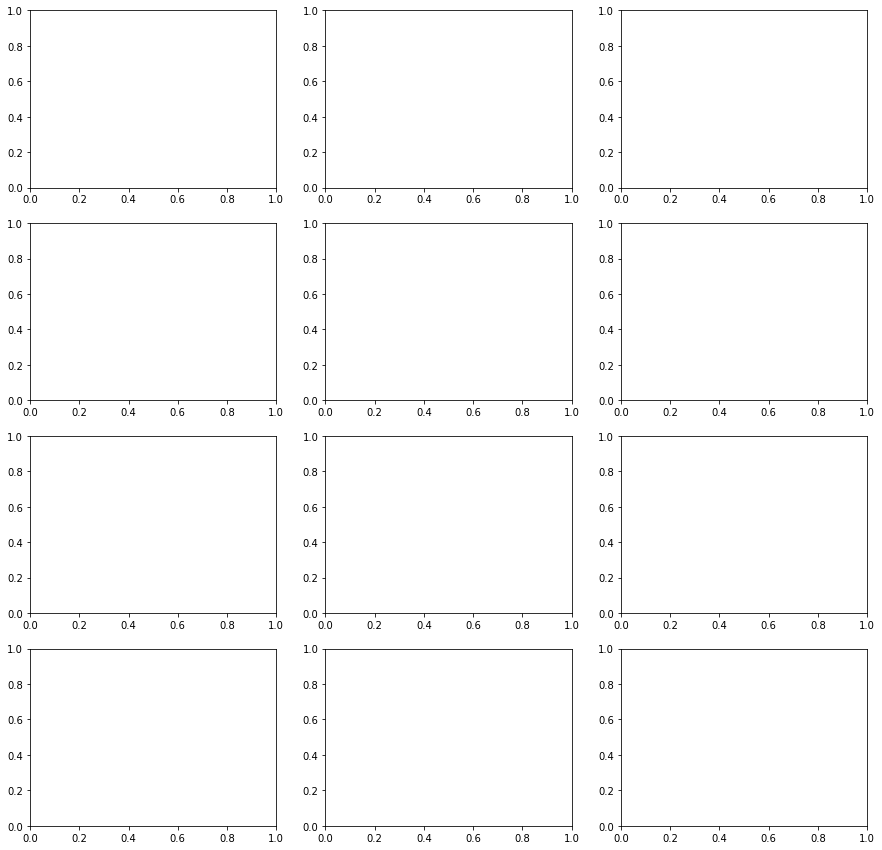

In [173]:
fig,ax = plt.subplots(4,3,figsize=(15,15))
count = 1
for i in range(4):
    for j in range(3):
        sns.distplot(clone.iloc[:,count],ax=ax[i,j])
        #ax[i,j].set_title(clone.columns[count])
        count+=1


In [273]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(clone.iloc[:,1:-1],clone.iloc[:,-1])

In [280]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,LogisticRegression
model1 = LogisticRegression()
model2 = Lasso()
model3 = ElasticNet()
model1.fit(X_train.astype("int"),(Y_train).astype("int"))
y_pred = model1.predict(X_test)

/home/rosguy/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rosguy/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


# Data Grouping Approach
* Analyze data grouped by place. See if any correlation exists within a particular locality

In [120]:
df_list = []
for city in df["Region"].unique():
    temp_df = clone[clone["Region"]==city]
    df_list.append(temp_df)
    

In [151]:
#new_df,col_names = transform(clone,[0,1,3,4,7],0)
reg_list = []
new_dflist = []
for dfs in df_list:
    dfs = dfs.set_index("people_ID")
    reg_list.append(dfs["Region"].values[0])
    if("Region" in dfs.keys()):
        dfs = dfs.drop(["Region"],axis=1)
    new_dfs,col_names = transform(dfs,[0,1,3,4,7],0)
    for key in new_dfs.keys():
        dfs[key]=new_dfs[key]
    df_encoded = dfs
    new_dflist.append(df_encoded)
    
    

In [153]:
##TESTER3##
new_dflist[0].head().transpose()

people_ID,1,2,3,4,5
Gender,0.00000,0.00000,0.000,0.000000,0.0000
Married,1.00000,1.00000,0.000,1.000000,0.0000
Children,1.00000,2.00000,1.000,1.000000,2.0000
Occupation,4.00000,4.00000,1.000,3.000000,6.0000
Mode_transport,1.00000,2.00000,1.000,0.000000,0.0000
cases/1M,2.00000,2.00000,2.000,2.000000,2.0000
Deaths/1M,0.00000,0.00000,0.000,0.000000,0.0000
comorbidity,2.00000,1.00000,3.000,0.000000,1.0000
Age,68.00000,64.00000,19.000,33.000000,23.0000
Insurance,3600000.00000,1600000.00000,3400000.000,700000.000000,3200000.0000


In [158]:
new_dflist[1].head().transpose()

people_ID,1268,1269,1270,1271,1272
Gender,0.000000,0.000000,0.000000,0.00000,0.0000
Married,1.000000,1.000000,1.000000,1.00000,0.0000
Children,1.000000,2.000000,1.000000,2.00000,2.0000
Occupation,4.000000,0.000000,3.000000,6.00000,2.0000
Mode_transport,0.000000,0.000000,2.000000,0.00000,2.0000
cases/1M,2.000000,2.000000,2.000000,2.00000,2.0000
Deaths/1M,0.000000,0.000000,0.000000,0.00000,0.0000
comorbidity,1.000000,0.000000,3.000000,0.00000,0.0000
Age,64.000000,27.000000,67.000000,66.00000,19.0000
Insurance,2100000.000000,3000000.000000,3500000.000000,4300000.00000,4000000.0000


TITLE:  Bengaluru


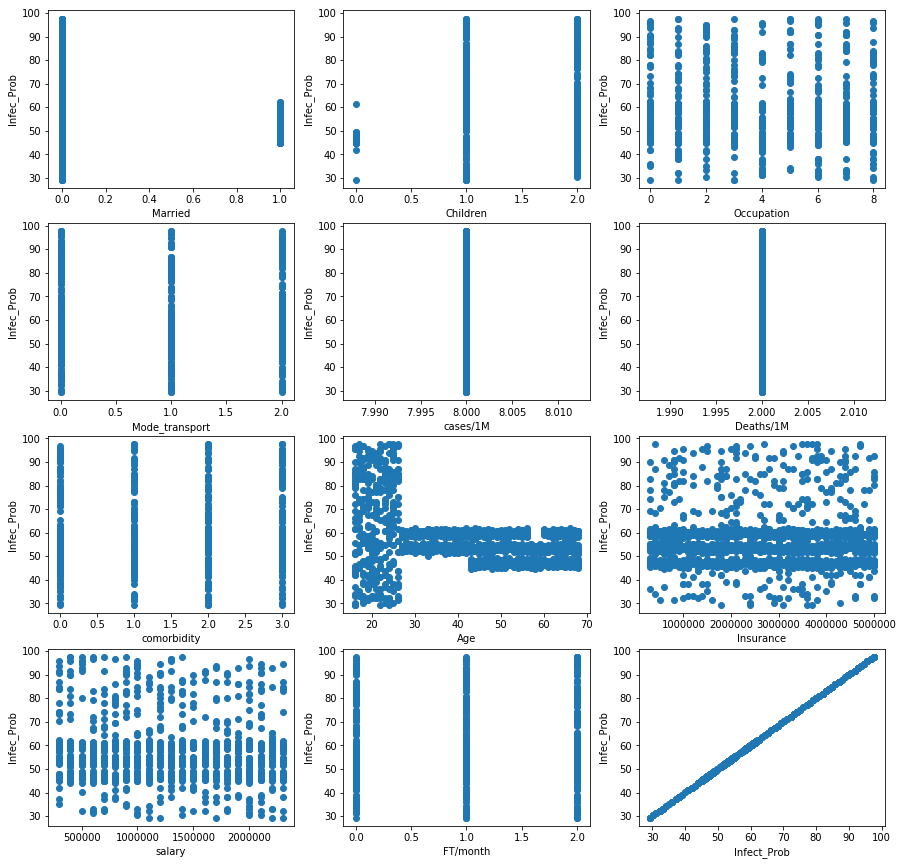

In [172]:
print("TITLE: ",reg_list[4])
plot_corrs(new_dflist[4],4,3)

# PCA

In [187]:
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler,OneHotEncoder
k_pca = KernelPCA(kernel = "rbf",n_components=5)
scaler = StandardScaler()
onehot = OneHotEncoder(sparse=False)


In [193]:
###TESTER####
#clone = clone.set_index("people_ID")
clone_contin = clone.iloc[:,[3,6,9,10,11,12]]
clone_disc =clone.iloc[:,[1,2,4,5,8]]
clone_disc = onehot.fit_transform(clone_disc)
scaled_contin = scaler.fit_transform(clone_contin)
pca_contin = k_pca.fit_transform(scaled_contin)
final_df = pd.concat([pd.DataFrame(clone_disc),pd.DataFrame(pca_contin)],axis=1)

In [195]:
final_df.head()
#clone_med = medical_df.copy()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,0,1,2,3,4
0,1,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0.347680,-0.210683,-0.157409,0.303984,0.209557
1,1,0,0,1,0,0,0,0,1,0,...,1,0,1,0,0,-0.009496,0.107779,-0.064269,0.293488,-0.344824
2,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,-0.341280,0.115195,-0.003469,0.219990,0.092795
3,1,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,-0.047270,-0.121406,-0.309504,-0.474124,-0.095070
4,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,-0.581153,0.074166,-0.065510,0.141811,0.104800


# Medical Data Analysis

In [41]:
clone_med = clone_med.drop(labels=["Pulmonary score","cardiological pressure"],axis=1)
clone_med = clone_med.dropna()

In [42]:
clone_med.head().transpose()

,0,2,3,4,5
people_ID,1.00000,3.000,4.000000,5.0000,6.000000
Coma score,8.00000,13.000,9.000000,7.0000,9.000000
Diuresis,441.00000,416.000,410.000000,390.0000,389.000000
Platelets,154.00000,124.000,98.000000,21.0000,139.000000
HBB,93.00000,137.000,167.000000,153.0000,86.000000
d-dimer,233.00000,213.000,275.000000,331.0000,216.000000
Heart rate,82.00000,77.000,64.000000,71.0000,94.000000
HDL cholesterol,58.00000,43.000,60.000000,64.0000,38.000000
Charlson Index,27.00000,40.000,27.000000,32.0000,5.000000
Blood Glucose,7.00000,6.000,7.000000,7.0000,5.000000


In [238]:
clone_med.corr()

,people_ID,Coma score,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Infect_Prob
people_ID,1.000000,0.007431,0.024363,0.000319,0.012886,-0.006043,0.013367,0.028347,0.016972,0.005666,0.057330
Coma score,0.007431,1.000000,0.008513,-0.015426,0.004457,-0.001935,-0.009409,0.003958,-0.011577,0.019266,0.037414
Diuresis,0.024363,0.008513,1.000000,0.010084,-0.002264,-0.011036,-0.007519,0.008054,0.016318,-0.012837,0.005252
Platelets,0.000319,-0.015426,0.010084,1.000000,-0.010962,0.013611,-0.003001,-0.024194,0.000472,0.014140,0.065813
HBB,0.012886,0.004457,-0.002264,-0.010962,1.000000,-0.005531,-0.001532,0.008270,0.005942,0.000524,0.011772
d-dimer,-0.006043,-0.001935,-0.011036,0.013611,-0.005531,1.000000,-0.004097,-0.000070,0.001003,-0.009102,0.022064
Heart rate,0.013367,-0.009409,-0.007519,-0.003001,-0.001532,-0.004097,1.000000,-0.014276,-0.009038,-0.008437,-0.003640
HDL cholesterol,0.028347,0.003958,0.008054,-0.024194,0.008270,-0.000070,-0.014276,1.000000,-0.000871,-0.001288,0.014239
Charlson Index,0.016972,-0.011577,0.016318,0.000472,0.005942,0.001003,-0.009038,-0.000871,1.000000,-0.000491,-0.012937
Blood Glucose,0.005666,0.019266,-0.012837,0.014140,0.000524,-0.009102,-0.008437,-0.001288,-0.000491,1.000000,-0.008973


In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(clone_med.iloc[:,:-1],clone_med.iloc[:,-1])


In [47]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
model1 = DecisionTreeRegressor()
#model2 = SVR(kernel="poly")
model3 = RandomForestRegressor(n_estimators=10)
model1.fit(X_train,Y_train)
y_pred = model1.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_pred,Y_test)


-0.7395523598115099

In [51]:
total_clone = pd.concat([clone,clone_med],axis=1)
total_clone = total_clone.dropna()

-4.940701679487202

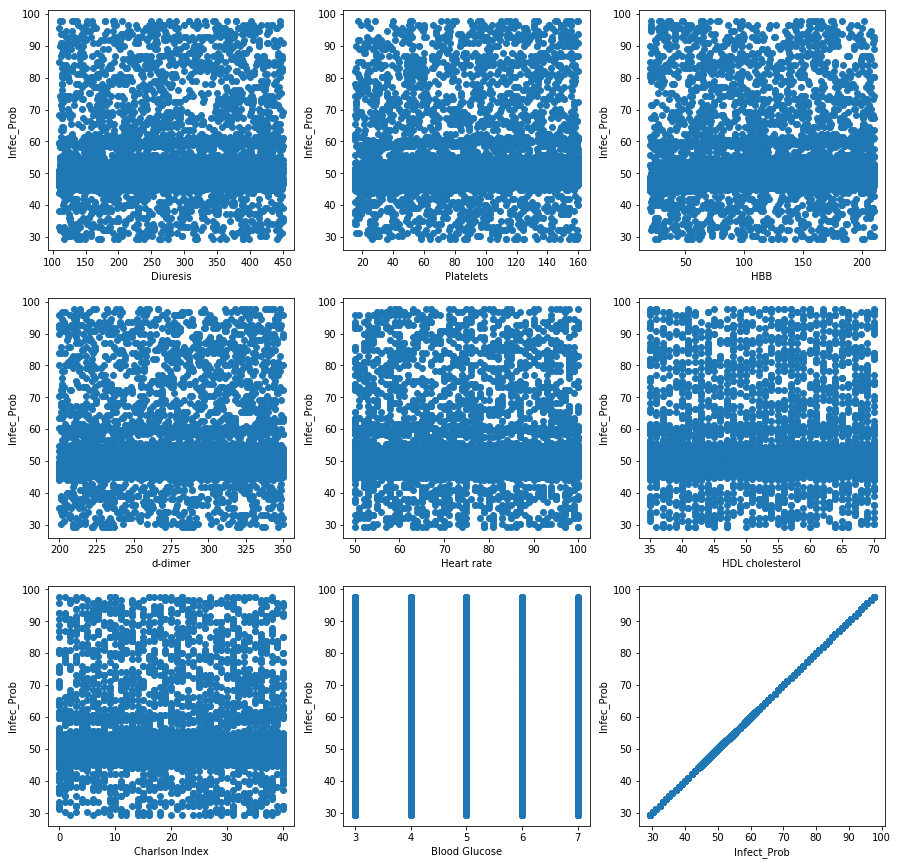

In [62]:
#clone_med = clone_med.set_index("people_ID")

plot_corrs(clone_med,3,3)

In [212]:
from sklearn.decomposition import KernelPCA,PCA
from sklearn.preprocessing import StandardScaler,OneHotEncoder
k_pca = KernelPCA(kernel = "poly",n_components=5)
pca = PCA(n_)
scaler = StandardScaler()
onehot = OneHotEncoder(sparse=False)


In [213]:
scaled = scaler.fit_transform(clone_med.iloc[:,:-1])

scaled_pca = k_pca.fit_transform(scaled)


# Dummy Model - Medical

In [214]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(scaled_pca,clone_med.iloc[:,-1])
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
model1 = DecisionTreeRegressor()
#model2 = SVR(kernel="poly")
model3 = RandomForestRegressor(n_estimators=8)
model1.fit(X_train,Y_train)
y_pred = model1.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_pred,Y_test)


-0.7966683661681577